In [1]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns

import re

import string
from nltk.stem import PorterStemmer
from string import punctuation
from nltk.corpus import stopwords

# Loading Data

In [2]:
df = pd.read_csv('archive/training.1600000.processed.noemoticon.csv', delimiter=',', encoding='Latin1')

In [3]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.shape

(1048572, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [6]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [7]:
df.drop(['id of the tweet', 'date of the tweet', 'query', 'user'], axis=1, inplace=True)

In [8]:
df.head()

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [9]:
df.columns =['sentimate', 'text']

In [10]:
df.columns

Index(['sentimate', 'text'], dtype='object')

<Axes: xlabel='sentimate', ylabel='Count'>

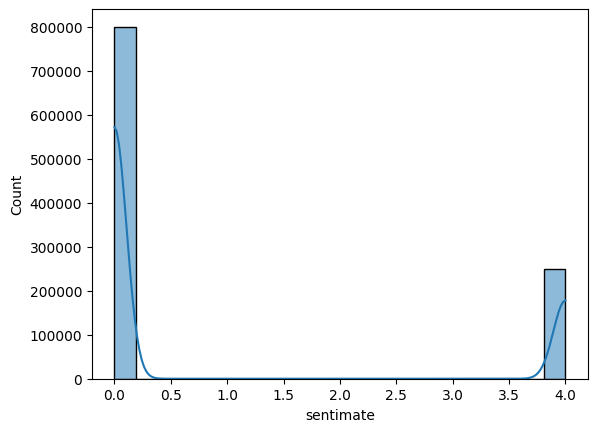

In [11]:
sns.histplot(df['sentimate'], kde= True)

In [12]:
df['sentimate'] = df['sentimate'].replace({4:1})

<Axes: xlabel='sentimate', ylabel='Count'>

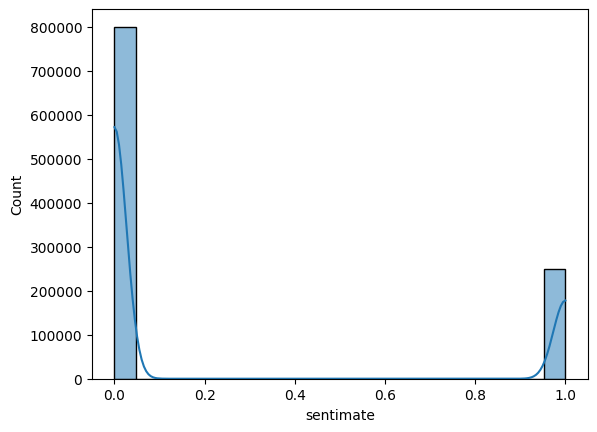

In [13]:
sns.histplot(df['sentimate'], kde=True)

# Preprocessing

In [14]:
ps = PorterStemmer()
stopwords = set(stopwords.words('english') + list(punctuation))

def remove_unnecessary_characters(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text) # remove tags
    text = re.sub("(\\d|\\W)+"," ",text) # remove special characters and digits
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stopwords]
    text = ' '.join(text)
    return text
df['cleaned_text'] = df['text'].apply(remove_unnecessary_characters)

In [15]:
df

,sentimate,text,cleaned_text
0,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
4,0,@Kwesidei not the whole crew,kwesidei whole crew
...,...,...,...
1048567,1,My GrandMa is making Dinenr with my Mum,grandma make dinenr mum
1048568,1,Mid-morning snack time... A bowl of cheese noo...,mid morn snack time bowl chees noodl yum
1048569,1,@ShaDeLa same here say it like from the Termi...,shadela say like termini movi come like word
1048570,1,@DestinyHope92 im great thaanks wbuu?,destinyhop im great thaank wbuu


In [16]:
positive_words = ' '.join(df[df['sentimate'] == 1]['cleaned_text'])
negative_words = ' '.join(df[df['sentimate'] == 0]['cleaned_text'])

# Word CLoud

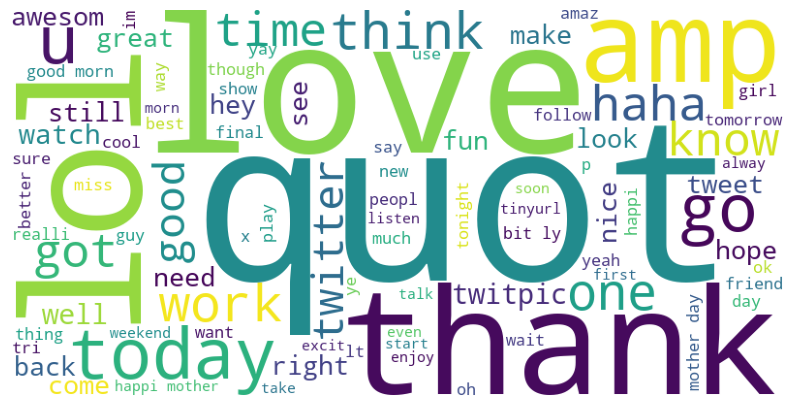

In [17]:
# For Positive Data
from wordcloud import WordCloud
positive_wordcloud = WordCloud(width=800,
                               height=400,
                               background_color='white',                   
                               max_words = 90).generate(positive_words)

plt.figure(figsize=(10,7))
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.show()

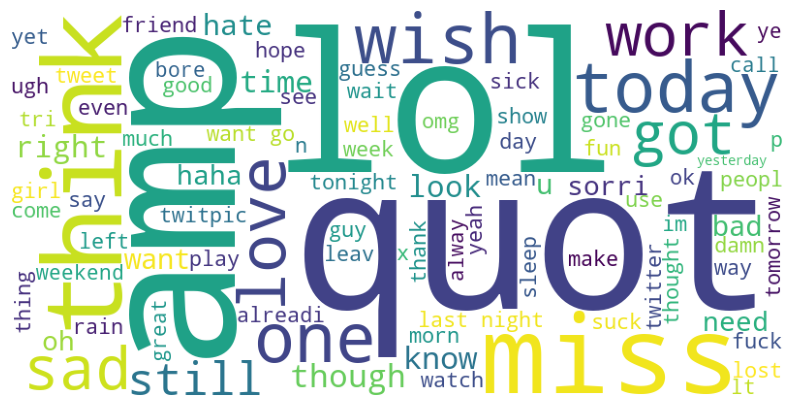

In [18]:
# For Negative Data
negative_wordcloud = WordCloud(width=800,
                               height=400,
                               background_color='white',
                               max_words = 90).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.show()

In [19]:
X = df['cleaned_text']
y = df['sentimate']

# TFIDF for sentiment analysis

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[150832,   9030],
       [ 26262,  23591]], dtype=int64)

In [24]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

83.1714469637365